In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.isnull().sum()

UID                0
BLOCKID        27321
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          268
married          191
married_snp      191
separated        191
divorced         191
Length: 80, dtype: int64

In [4]:
train=train.drop(['BLOCKID'],axis=1)
test=test.drop(['BLOCKID'],axis=1)

In [5]:
cols=['home_equity_second_mortgage','second_mortgage','home_equity','debt','hs_degree','hs_degree_male','hs_degree_female','pct_own','married','married_snp','separated','divorced']
for columns in cols:
    train[cols]=train[cols]*100
    test[cols]=test[cols]*100

In [6]:
test['hc_mortgage_mean'].isna().sum()

268

In [7]:
train['hc_mortgage_mean'].isna().sum()

573

In [8]:
train=train.dropna(subset=['hc_mortgage_mean'])

In [9]:
train

UID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
0      267822       140        53       36      New York       NY   
1      246444       140       141       18       Indiana       IN   
2      245683       140        63       18       Indiana       IN   
3      279653       140       127       72   Puerto Rico       PR   
4      247218       140       161       20        Kansas       KS   
...       ...       ...       ...      ...           ...      ...   
27316  279212       140        43       72   Puerto Rico       PR   
27317  277856       140        91       42  Pennsylvania       PA   
27318  233000       140        87        8      Colorado       CO   
27319  287425       140       439       48         Texas       TX   
27320  265371       140         3       32        Nevada       NV   

              city             place     type primary  ...  female_age_mean  \
0         Hamilton          Hamilton     City   tract  ...         44.48629   
1       South Bend          Roseland     City   tract  ...         36.48391   
2         Danville          Danville     City   tract  ...         42.15810   
3         San Juan          Guaynabo    Urban   tract  ...         47.77526   
4        Manhattan    Manhattan City     City   tract  ...         24.17693   
...            ...               ...      ...     ...  ...              ...   
27316        Coamo             Coamo    Urban   tract  ...         42.73154   
27317    Blue Bell         Blue Bell  Borough   tract  ...         38.21269   
27318      Weldona      Saddle Ridge     City   tract  ...         43.40218   
27319  Colleyville  Colleyville City     Town   tract  ...         39.25921   
27320    Las Vegas          Paradise     City   tract  ...         34.45345   

       female_age_median  female_age_stdev  female_age_sample_weight  \
0               45.33333          22.51276                 685.33845   
1               37.58333          23.43353                 267.23367   
2               42.83333          23.94119                 707.01963   
3               50.58333          24.32015                 362.20193   
4               21.58333          11.10484                1854.48652   
...                  ...               ...                       ...   
27316           40.16667          24.79821                 230.87898   
27317           39.50000          21.84826                 496.20427   
27318           46.33333          23.40858                 316.52078   
27319           43.41667          21.36235                1373.94120   
27320           29.83333          19.77208                 526.73261   

       female_age_samples       pct_own       married   married_snp  \
0                  2618.0  7.904600e+23  5.785100e+23  1.882000e+22   
1                  1284.0  5.248300e+23  3.488600e+23  1.426000e+22   
2                  3238.0  8.533100e+23  6.474500e+23  2.830000e+22   
3                  1559.0  6.503700e+23  4.725700e+23  2.021000e+22   
4                  3051.0  1.304600e+23  1.235600e+23  0.000000e+00   
...                   ...           ...           ...           ...   
27316               938.0  6.042200e+23  2.460300e+23  3.042000e+22   
27317              2039.0  6.807200e+23  6.112700e+23  5.003000e+22   
27318              1364.0  7.850800e+23  7.045100e+23  1.386000e+22   
27319              5815.0  9.397000e+23  7.550300e+23  2.287000e+22   
27320              1911.0  2.791200e+23  3.442600e+23  3.825000e+22   

          separated      divorced  
0      1.240000e+22  8.770000e+22  
1      1.426000e+22  9.030000e+22  
2      1.607000e+22  1.065700e+23  
3      2.021000e+22  1.010600e+23  
4      0.000000e+00  3.109000e+22  
...             ...           ...  
27316  2.249000e+22  1.468300e+23  
27317  2.473000e+22  4.888000e+22  
27318  5.200000e+21  7.712000e+22  
27319  9.150000e+21  5.261000e+22  
27320  3.005000e+22  1.332000e+23  

[26748 rows x 79 columns]

In [10]:
train["rent"]=train["rent_median"]
train=train.drop(['rent_mean','rent_median','rent_stdev','rent_sample_weight','rent_samples','rent_gt_10','rent_gt_15','rent_gt_20','rent_gt_25','rent_gt_30','rent_gt_35','rent_gt_40','rent_gt_50'],axis=1)
test["rent"]=test["rent_median"]
test=test.drop(['rent_mean','rent_median','rent_stdev','rent_sample_weight','rent_samples','rent_gt_10','rent_gt_15','rent_gt_20','rent_gt_25','rent_gt_30','rent_gt_35','rent_gt_40','rent_gt_50'],axis=1)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26748 entries, 0 to 27320
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          26748 non-null  int64  
 1   SUMLEVEL                     26748 non-null  int64  
 2   COUNTYID                     26748 non-null  int64  
 3   STATEID                      26748 non-null  int64  
 4   state                        26748 non-null  object 
 5   state_ab                     26748 non-null  object 
 6   city                         26748 non-null  object 
 7   place                        26748 non-null  object 
 8   type                         26748 non-null  object 
 9   primary                      26748 non-null  object 
 10  zip_code                     26748 non-null  int64  
 11  area_code                    26748 non-null  int64  
 12  lat                          26748 non-null  float64
 13  lng             

In [12]:
categorical_cols=train.select_dtypes(exclude=np.number)
numerical_cols=train.select_dtypes(include=np.number)

In [13]:
((train[numerical_cols.columns].isnull().sum())/train[categorical_cols.columns].shape[0])*100

UID            0.000000
SUMLEVEL       0.000000
COUNTYID       0.000000
STATEID        0.000000
zip_code       0.000000
                 ...   
married        0.007477
married_snp    0.007477
separated      0.007477
divorced       0.007477
rent           0.130851
Length: 61, dtype: float64

In [14]:
for cols in numerical_cols.columns:
    train[cols].fillna(train[cols].mean(),inplace=True)

In [15]:
featurecols=['male_pop','female_pop','male_age_median','female_age_median','pct_own','married','married_snp','separated','divorced','debt','second_mortgage','home_equity','home_equity_second_mortgage','rent','hi_median']
#feature=test[featurecols]
#feature.isnull().sum()
for cols in featurecols:
    test[cols].fillna(test[cols].mean(),inplace=True)

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   SUMLEVEL                     11709 non-null  int64  
 2   COUNTYID                     11709 non-null  int64  
 3   STATEID                      11709 non-null  int64  
 4   state                        11709 non-null  object 
 5   state_ab                     11709 non-null  object 
 6   city                         11709 non-null  object 
 7   place                        11709 non-null  object 
 8   type                         11709 non-null  object 
 9   primary                      11709 non-null  object 
 10  zip_code                     11709 non-null  int64  
 11  area_code                    11709 non-null  int64  
 12  lat                          11709 non-null  float64
 13  lng             

In [17]:
(test.isnull().sum()/test.shape[0])*100

UID            0.0
SUMLEVEL       0.0
COUNTYID       0.0
STATEID        0.0
state          0.0
              ... 
married        0.0
married_snp    0.0
separated      0.0
divorced       0.0
rent           0.0
Length: 67, dtype: float64

In [18]:
#Inequality in median and mean imply the presence of outliers,hence we take the median for reference purposes
train["household_income"]=train["hi_median"]
#dropping all other columns as they are not required
train=train.drop(['hi_mean','hi_median','hi_stdev','hi_sample_weight','hi_samples'],axis=1)
#repeating for test data
test["household_income"]=test["hi_median"]
test=test.drop(['hi_mean','hi_median','hi_stdev','hi_sample_weight','hi_samples'],axis=1)

In [19]:
train['bad_debt']=train['second_mortgage']+train['home_equity']-train['home_equity_second_mortgage']
test['bad_debt']=test['second_mortgage']+test['home_equity']-test['home_equity_second_mortgage']

In [20]:
train['population_density']=train['pop']/train['ALand']
test['population_density']=test['pop']/test['ALand']

In [21]:
train['good_debt']=train['debt']-train['bad_debt']
test['good_debt']=test['debt']-test['bad_debt']

In [22]:
train=train.drop(['state_ab'],axis=1)
test=test.drop(['state_ab'],axis=1)

In [23]:
train['male_age']=train['male_age_median']
train['female_age']=train['female_age_median']
test['male_age']=test['male_age_median']
test['female_age']=test['female_age_median']

In [24]:
train['median_age']=(train['male_age_median']*train['male_pop']+train['female_age_median']*train['female_pop'])/(train['male_pop']+train['female_pop'])
test['median_age']=(test['male_age_median']*test['male_pop']+test['female_age_median']*test['female_pop'])/(test['male_pop']+test['female_pop'])

In [25]:
test['median_age'].isnull().sum()

81

In [26]:
test['median_age'].fillna(test['median_age'].mean(),inplace=True)

In [27]:
test['median_age'].isnull().sum()

0

In [28]:
train=train.drop(['male_age_mean','male_age_median','male_age_stdev','male_age_sample_weight','male_age_samples','female_age_mean','female_age_median','female_age_stdev','female_age_sample_weight','female_age_samples'],axis=1)
test=test.drop(['male_age_mean','male_age_median','male_age_stdev','male_age_sample_weight','male_age_samples','female_age_mean','female_age_median','female_age_stdev','female_age_sample_weight','female_age_samples'],axis=1)

In [29]:
train=train.drop(['universe_samples','used_samples'],axis=1)
test=test.drop(['universe_samples','used_samples'],axis=1)

In [30]:
train=train.drop(['second_mortgage_cdf','home_equity_cdf','debt_cdf'],axis=1)
test=test.drop(['second_mortgage_cdf','home_equity_cdf','debt_cdf'],axis=1)

In [31]:
train=train.drop(['hc_mortgage_stdev','hc_mortgage_sample_weight','hc_mortgage_samples'],axis=1)
test=test.drop(['hc_mortgage_stdev','hc_mortgage_sample_weight','hc_mortgage_samples'],axis=1)

In [32]:
train=train.drop(['hc_stdev','hc_samples','hc_sample_weight'],axis=1)
test=test.drop(['hc_stdev','hc_samples','hc_sample_weight'],axis=1)

In [33]:
train=train.drop(['ALand','AWater','family_stdev','family_sample_weight','family_samples'],axis=1)
test=test.drop(['ALand','AWater','family_stdev','family_sample_weight','family_samples'],axis=1)

In [34]:
train['family_income']=train['family_median']
test['family_income']=test['family_median']

In [35]:
train=train.drop(['family_mean','family_median'],axis=1)
test=test.drop(['family_mean','family_median'],axis=1)

In [36]:
train=train.drop(['UID','SUMLEVEL','COUNTYID','STATEID'],axis=1)
test=test.drop(['UID','SUMLEVEL','COUNTYID','STATEID'],axis=1)

In [37]:
train['mortgage_costs']=train['hc_mortgage_mean']-train['hc_mean']
train['house_owner_costs']=train['hc_mean']
train['house_mortage+owner_costs']=train['hc_mortgage_mean']

In [38]:
test['mortgage_costs']=test['hc_mortgage_mean']-test['hc_mean']
test['house_owner_costs']=test['hc_mean']
test['house_mortage+owner_costs']=test['hc_mortgage_mean']

In [39]:
train=train.drop(['hc_mortgage_mean','hc_mortgage_median','hc_mean','hc_median'],axis=1)
test=test.drop(['hc_mortgage_mean','hc_mortgage_median','hc_mean','hc_median'],axis=1)

In [40]:
train=train.drop(['zip_code','area_code','lat','lng'],axis=1)

In [41]:
test=test.drop(['zip_code','area_code','lat','lng'],axis=1)

In [42]:
test.isnull().sum()

state                            0
city                             0
place                            0
type                             0
primary                          0
pop                              0
male_pop                         0
female_pop                       0
home_equity_second_mortgage      0
second_mortgage                  0
home_equity                      0
debt                             0
hs_degree                       85
hs_degree_male                  89
hs_degree_female               105
pct_own                          0
married                          0
married_snp                      0
separated                        0
divorced                         0
rent                             0
household_income                 0
bad_debt                         0
population_density               0
good_debt                        0
male_age                         0
female_age                       0
median_age                       0
family_income       

In [43]:
train=train.drop(['mortgage_costs'],axis=1)
test=test.drop(['mortgage_costs'],axis=1)

In [44]:
selection=['hs_degree','hs_degree_male','hs_degree_female','family_income','house_owner_costs']
for cols in selection:
    test[cols].fillna(test[cols].mean(),inplace=True)

In [45]:
test.isnull().sum()

state                            0
city                             0
place                            0
type                             0
primary                          0
pop                              0
male_pop                         0
female_pop                       0
home_equity_second_mortgage      0
second_mortgage                  0
home_equity                      0
debt                             0
hs_degree                        0
hs_degree_male                   0
hs_degree_female                 0
pct_own                          0
married                          0
married_snp                      0
separated                        0
divorced                         0
rent                             0
household_income                 0
bad_debt                         0
population_density               0
good_debt                        0
male_age                         0
female_age                       0
median_age                       0
family_income       

In [46]:
train.isnull().sum()

state                          0
city                           0
place                          0
type                           0
primary                        0
pop                            0
male_pop                       0
female_pop                     0
home_equity_second_mortgage    0
second_mortgage                0
home_equity                    0
debt                           0
hs_degree                      0
hs_degree_male                 0
hs_degree_female               0
pct_own                        0
married                        0
married_snp                    0
separated                      0
divorced                       0
rent                           0
household_income               0
bad_debt                       0
population_density             0
good_debt                      0
male_age                       0
female_age                     0
median_age                     0
family_income                  0
house_owner_costs              0
house_mort

In [47]:
#Now that the datacleaning is done,
#the train data set is taken for EDA purposes and the 268 missing values in test data are predicted after model building
train.head(10)

state                 city                      place   type  \
0        New York             Hamilton                   Hamilton   City   
1         Indiana           South Bend                   Roseland   City   
2         Indiana             Danville                   Danville   City   
3     Puerto Rico             San Juan                   Guaynabo  Urban   
4          Kansas            Manhattan             Manhattan City   City   
5         Alabama              Trinity                    Trinity   Town   
6           Texas               Nocona                Nocona City   Town   
7  South Carolina              Taylors                 Tigerville   City   
8        New York  South Richmond Hill              New York City   City   
9      California  Rancho Palos Verdes  Palos Verdes Estates City   City   

  primary   pop  male_pop  female_pop  home_equity_second_mortgage  \
0   tract  5230      2612        2618                 1.588000e+22   
1   tract  2633      1349        1284                 2.222000e+22   
2   tract  6881      3643        3238                 0.000000e+00   
3   tract  2700      1141        1559                 1.086000e+22   
4   tract  5637      2586        3051                 5.426000e+22   
5   tract  5475      2564        2911                 0.000000e+00   
6   tract  1947       994         953                 0.000000e+00   
7   tract  3476      1658        1818                 3.355000e+22   
8   tract  3530      1778        1752                 2.331000e+22   
9   tract  4139      2086        2053                 1.229000e+22   

   second_mortgage  ...  household_income      bad_debt  population_density  \
0     2.077000e+22  ...           48120.0  9.408000e+22            0.000026   
1     2.222000e+22  ...           35186.0  4.274000e+22            0.001687   
2     0.000000e+00  ...           74964.0  9.512000e+22            0.000099   
3     1.086000e+22  ...           37845.0  1.086000e+22            0.002442   
4     5.426000e+22  ...           22497.0  5.426000e+22            0.002207   
5     0.000000e+00  ...           44873.0  5.991000e+22            0.000070   
6     0.000000e+00  ...           43761.0  0.000000e+00            0.000003   
7     3.355000e+22  ...           59504.0  9.665000e+22            0.000022   
8     2.331000e+22  ...           44906.0  1.144100e+23            0.022401   
9     2.809000e+22  ...           98399.0  2.282700e+23            0.001161   

      good_debt  male_age  female_age  median_age  family_income  \
0  4.355500e+23  44.00000    45.33333   44.667430        53245.0   
1  5.658100e+23  32.00000    37.58333   34.722748        43023.0   
2  6.397200e+23  40.83333    42.83333   41.774472        85395.0   
3  5.162800e+23  48.91667    50.58333   49.879012        44399.0   
4  4.651200e+23  22.41667    21.58333   21.965629        50272.0   
5  3.773000e+23  41.41667    36.41667   38.758223        48032.0   
6  3.437000e+23  40.00000    42.75000   41.346045        56405.0   
7  4.001600e+23  53.08333    49.75000   51.339949        69529.0   
8  5.720300e+23  30.66667    37.33333   33.975449        51123.0   
9  3.880600e+23  47.33333    50.50000   48.904041       124446.0   

   house_owner_costs  house_mortage+owner_costs  
0          570.01530                 1414.80295  
1          351.98293                  864.41390  
2          556.45986                 1506.06758  
3          288.04047                 1175.28642  
4          443.68855                 1192.58759  
5          338.91273                 1137.05215  
6          484.73723                 1339.98441  
7          391.71253                 1891.72540  
8          966.47211                 2941.26980  
9          971.13374                 3306.26240  

[10 rows x 31 columns]

In [48]:
#train.to_excel(r'C:\Users\lenovo\Downloads\Project 1\Tableau_Visualization.xlsx',index=False)

In [49]:
obj_cols=train.select_dtypes(exclude=np.number)
for columns in obj_cols:
    print(train[columns].unique())
    print('No of unique vales:',train[columns].nunique())
    print(train[columns].value_counts())
    print('x----------------------------------------------------x')

['New York' 'Indiana' 'Puerto Rico' 'Kansas' 'Alabama' 'Texas'
 'South Carolina' 'California' 'Arkansas' 'Maryland' 'Illinois' 'Iowa'
 'Tennessee' 'Nevada' 'Louisiana' 'Colorado' 'Rhode Island' 'Mississippi'
 'New Jersey' 'Oregon' 'Arizona' 'Florida' 'Wisconsin' 'Pennsylvania'
 'North Carolina' 'Virginia' 'Michigan' 'Ohio' 'Oklahoma' 'Georgia'
 'Idaho' 'South Dakota' 'Minnesota' 'Missouri' 'Washington' 'Wyoming'
 'Connecticut' 'West Virginia' 'Kentucky' 'Massachusetts'
 'District of Columbia' 'Hawaii' 'Montana' 'Alaska' 'New Hampshire' 'Utah'
 'Vermont' 'Nebraska' 'North Dakota' 'New Mexico' 'Maine' 'Delaware']
No of unique vales: 52
California              2862
Texas                   1886
New York                1710
Florida                 1572
Pennsylvania            1208
Illinois                1100
Ohio                    1079
Michigan                1018
North Carolina           812
Georgia                  760
New Jersey               690
Virginia                 672
Indiana   

Text(0.5, 1.0, 'DEBTS')

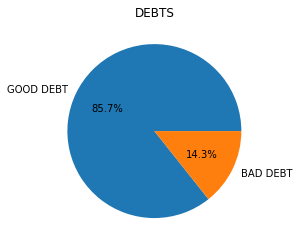

In [84]:
#pie charts (Venn diagram) to show overall debt(% bad and good debt) and bad debt(2 mortgage and home equity loan)
train['no_debt']=1-train['debt']
l=train['debt'].sum()
m=train['bad_debt'].sum()
data_a=[l,m]
labels=['GOOD DEBT','BAD DEBT']
plt.pie(data_a,autopct='%1.1f%%',labels=labels)
plt.title('DEBTS')

from matplotlib_venn import venn3
venn=['SECONDMORTGAGE','HOMEEQUITY']
venn3(train['second_mortgage'],train['home_equity'],train['home_equity_second_mortgage'],set_labels=venn)
plt.show()

<AxesSubplot:>

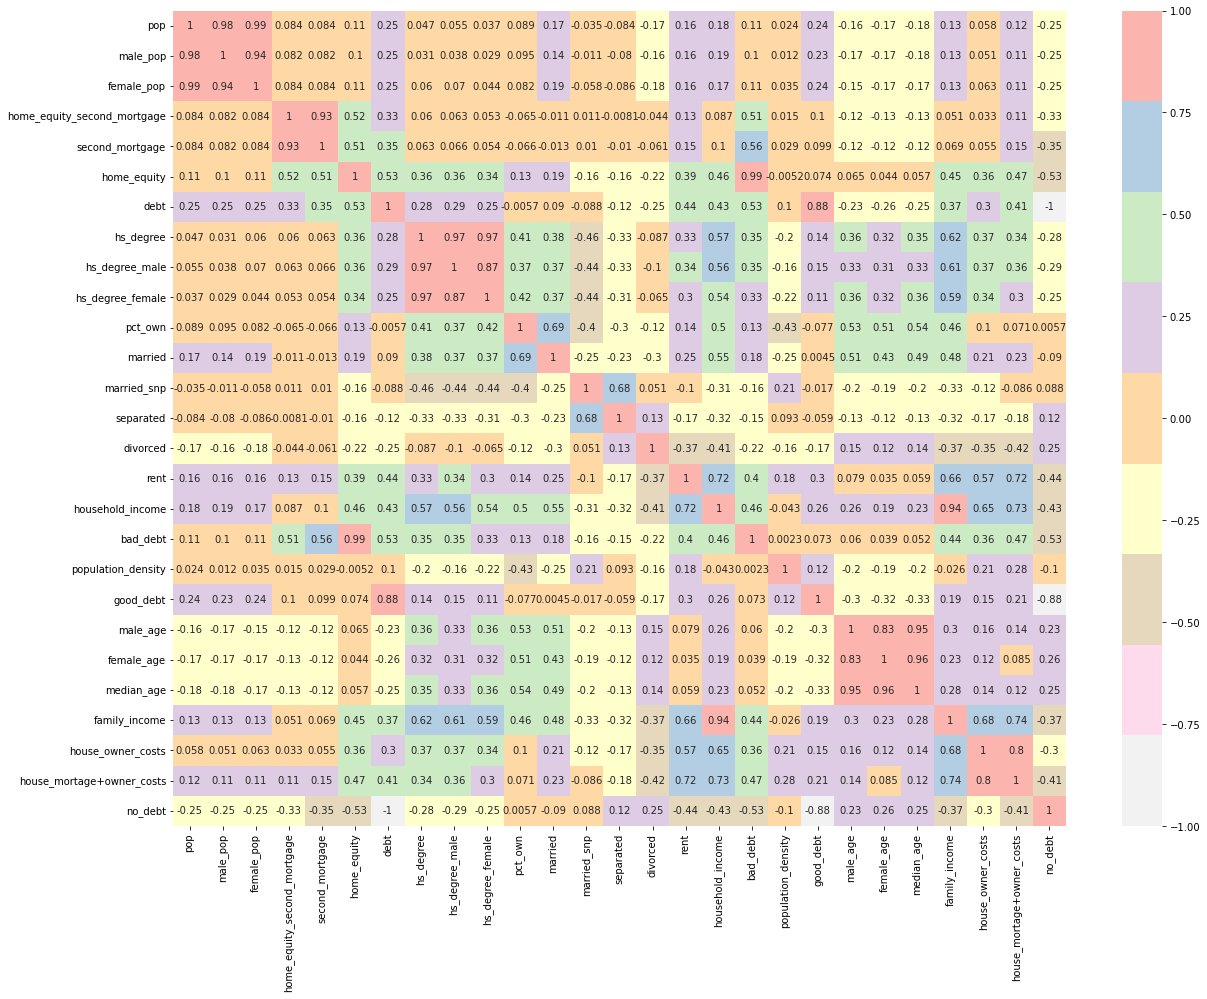

In [51]:
correlation=train.corr()
f, ax = plt.subplots(figsize =(20,15))
sns.heatmap(correlation, ax = ax, cmap ='Pastel1_r',annot=True)

Text(0.5, 1.0, 'DIVORCED')

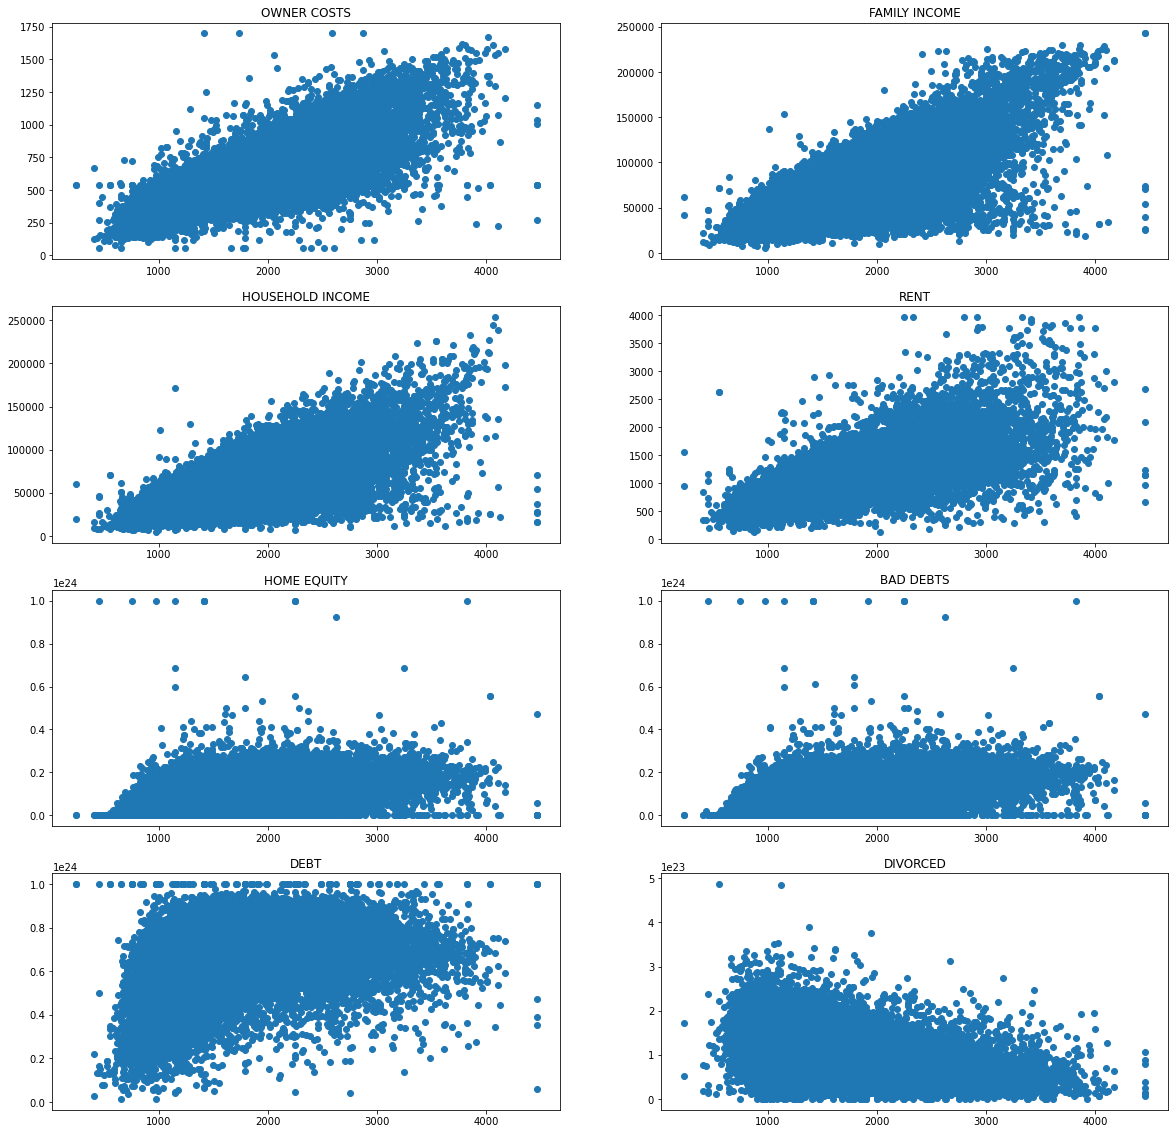

In [52]:
#From the above heatmap,the variables(x) that affect the target variable(y) 'house_mortgage+owner_costs' are
#1-house_owner_costs
#2-family_income
#3-household_income
#4-rent
#5-home_equity
#6-bad_debt
#7-debt
#8-divorced
figure, axis = plt.subplots(4,2,figsize =(20,20))
axis[0,0].scatter(train['house_mortage+owner_costs'],train['house_owner_costs'])
axis[0,0].set_title("OWNER COSTS")
axis[0,1].scatter(train['house_mortage+owner_costs'],train['family_income'])
axis[0,1].set_title("FAMILY INCOME")
axis[1,0].scatter(train['house_mortage+owner_costs'],train['household_income'])
axis[1,0].set_title("HOUSEHOLD INCOME")
axis[1,1].scatter(train['house_mortage+owner_costs'],train['rent'])
axis[1,1].set_title("RENT")
axis[2,0].scatter(train['house_mortage+owner_costs'],train['home_equity'])
axis[2,0].set_title("HOME EQUITY")
axis[2,1].scatter(train['house_mortage+owner_costs'],train['bad_debt'])
axis[2,1].set_title("BAD DEBTS")
axis[3,0].scatter(train['house_mortage+owner_costs'],train['debt'])
axis[3,0].set_title("DEBT")
axis[3,1].scatter(train['house_mortage+owner_costs'],train['divorced'])
axis[3,1].set_title("DIVORCED")

In [53]:
obj_cols

state         city             place     type primary
0          New York     Hamilton          Hamilton     City   tract
1           Indiana   South Bend          Roseland     City   tract
2           Indiana     Danville          Danville     City   tract
3       Puerto Rico     San Juan          Guaynabo    Urban   tract
4            Kansas    Manhattan    Manhattan City     City   tract
...             ...          ...               ...      ...     ...
27316   Puerto Rico        Coamo             Coamo    Urban   tract
27317  Pennsylvania    Blue Bell         Blue Bell  Borough   tract
27318      Colorado      Weldona      Saddle Ridge     City   tract
27319         Texas  Colleyville  Colleyville City     Town   tract
27320        Nevada    Las Vegas          Paradise     City   tract

[26748 rows x 5 columns]

<Figure size 1440x720 with 0 Axes>

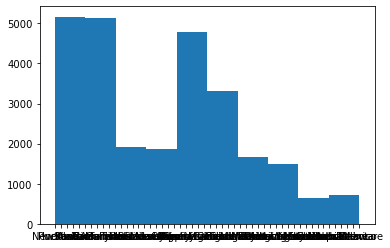

<Figure size 1440x720 with 0 Axes>

In [54]:
#plt.subplots()
plt.hist(train['state'])
plt.figure(figsize=(20,10))

[Text(0.5, 1.0, 'STATE')]

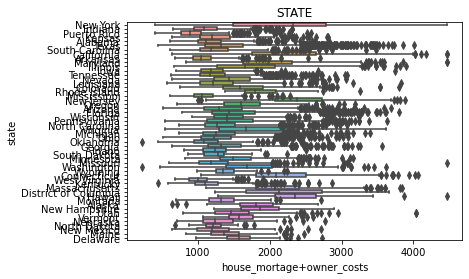

In [55]:
#k=train.nlargest(50,['house_mortage+owner_costs'])
sns.boxplot(train['house_mortage+owner_costs'],train['state']).set(title='STATE')

In [56]:
#sns.boxplot(train['house_mortage+owner_costs'],train['city']).set(title='CITY')

In [57]:
#sns.boxplot(train['house_mortage+owner_costs'],train['place']).set(title='PLACE')

[Text(0.5, 1.0, 'TYPE')]

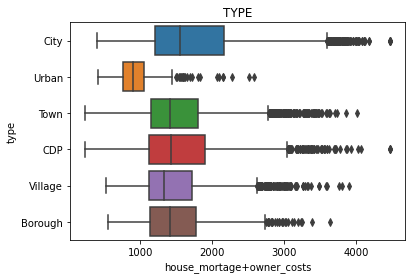

In [58]:
sns.boxplot(train['house_mortage+owner_costs'],train['type']).set(title='TYPE')

[Text(0.5, 1.0, 'PRIMARY')]

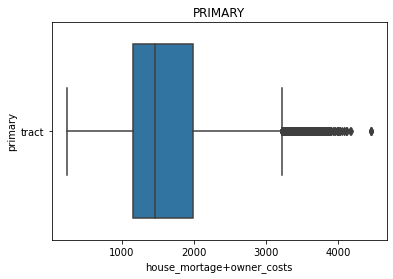

In [59]:
sns.boxplot(train['house_mortage+owner_costs'],train['primary']).set(title='PRIMARY')

In [60]:
#the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10%
owned_morethan_10=train[train['pct_own']>=10]
top=owned_morethan_10.nlargest(2500,['second_mortgage'])
top
#top.to_excel(r'C:\Users\lenovo\Downloads\Project 1\Top2500.xlsx',index=False)

state              city                  place  type primary  \
1211        Kentucky         Fort Knox              Fort Knox  City   tract   
7413        Virginia        Alexandria    Bailey's Crossroads  Town   tract   
16834       Kentucky         Fort Knox              Fort Knox  City   tract   
17083       Kentucky         Fort Knox              Fort Knox  City   tract   
17289      Louisiana         Fort Polk        Fort Polk North  City   tract   
...              ...               ...                    ...   ...     ...   
3866         Florida      Jacksonville             Fruit Cove  City   tract   
14632        Florida  Lauderdale Lakes  Lauderdale Lakes City  City   tract   
16766  Massachusetts         Hyde Park                 Dedham  City   tract   
18169     New Jersey          Paterson          Paterson City  City   tract   
21931        Florida             Ocala  Silver Springs Shores  City   tract   

         pop  male_pop  female_pop  home_equity_second_mortgage  \
1211    3937      1808        2129                 1.000000e+24   
7413    3904      2020        1884                 1.000000e+24   
16834   2661      1280        1381                 1.000000e+24   
17083   3937      1808        2129                 1.000000e+24   
17289   2391      1250        1141                 1.000000e+24   
...      ...       ...         ...                          ...   
3866   12223      6295        5928                 6.904000e+22   
14632   4385      1897        2488                 4.603000e+22   
16766   4700      2127        2573                 6.903000e+22   
18169   2255      1045        1210                 0.000000e+00   
21931   1997       919        1078                 4.828000e+22   

       second_mortgage  ...      bad_debt  population_density     good_debt  \
1211      1.000000e+24  ...  1.000000e+24            0.000389  0.000000e+00   
7413      1.000000e+24  ...  1.000000e+24            0.004387  0.000000e+00   
16834     1.000000e+24  ...  1.000000e+24            0.000647  0.000000e+00   
17083     1.000000e+24  ...  1.000000e+24            0.000389  0.000000e+00   
17289     1.000000e+24  ...  1.000000e+24            0.000133  0.000000e+00   
...                ...  ...           ...                 ...           ...   
3866      6.904000e+22  ...  1.213400e+23            0.000547  6.679600e+23   
14632     6.904000e+22  ...  8.577000e+22            0.004266  6.171600e+23   
16766     6.903000e+22  ...  1.104400e+23            0.002260  6.333000e+23   
18169     6.897000e+22  ...  6.897000e+22            0.005263  7.701100e+23   
21931     6.897000e+22  ...  8.506000e+22            0.000330  5.218400e+23   

       male_age  female_age  median_age  family_income  house_owner_costs  \
1211   25.91667    20.91667   23.212835        55270.0         541.126188   
7413   34.66667    28.91667   31.891824        46820.0         541.126188   
16834  24.50000    25.25000   24.889233        46983.0         541.126188   
17083  25.91667    20.91667   23.212835        55270.0         541.126188   
17289  23.08333    23.00000   23.043564        46593.0         541.126188   
...         ...         ...         ...            ...                ...   
3866   35.25000    40.00000   37.553690        80545.0         523.116790   
14632  32.66667    28.66667   30.397115        33382.0         431.864950   
16766  41.00000    43.33333   42.277374        81700.0         580.792280   
18169  29.91667    26.50000   28.083335        29243.0         899.466870   
21931  27.08333    39.66667   33.875939        36180.0         295.484130   

       house_mortage+owner_costs       no_debt  
1211                  1412.00000 -1.000000e+24  
7413                  1412.00000 -1.000000e+24  
16834                  449.50000 -1.000000e+24  
17083                 1412.00000 -1.000000e+24  
17289                 3824.65000 -1.000000e+24  
...                          ...           ...  
3866                  1357.40820 -7.893000e+

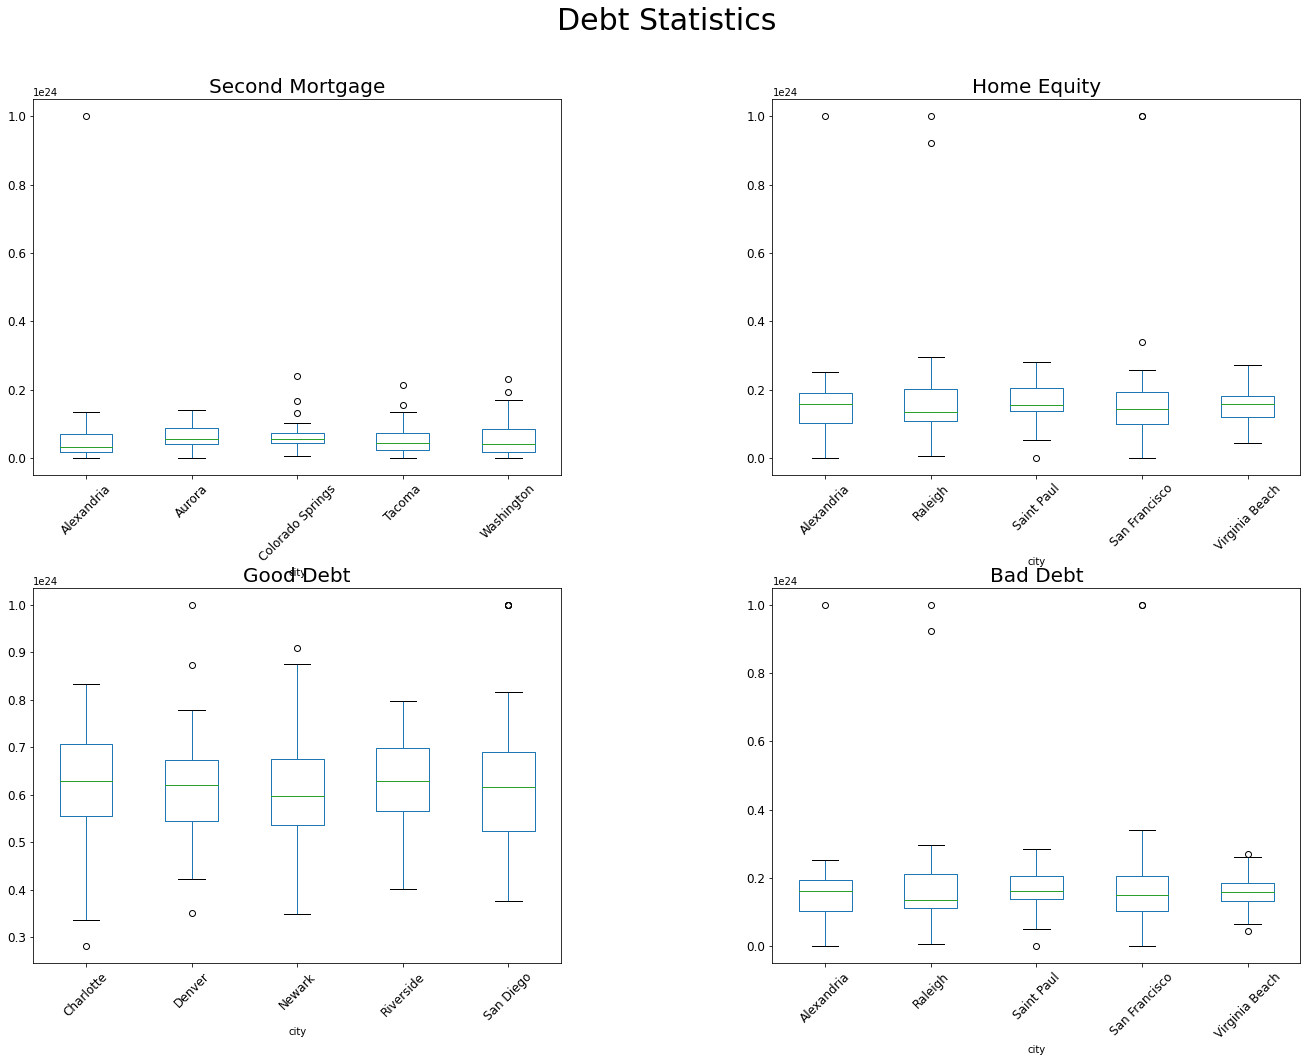

In [95]:
#Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt and bad debt for different cities
flds=['city','second_mortgage','home_equity','good_debt','bad_debt','pct_own']
fldp = ['second_mortgage','home_equity','good_debt','bad_debt']; 
data_b=train[flds]
city_count = data_b.city.value_counts()
bad_cities = city_count[city_count.values < 25].index.tolist()
df_city = data_b[data_b['pct_own']> .1][flds].groupby(['city']).mean().dropna()
df_city = df_city[~df_city.index.isin(bad_cities)]
f,ax = plt.subplots(2,2,figsize=(22,16))

title=[['Second Mortgage' , 'Home Equity'],['Good Debt','Bad Debt']]
j = 0;k=0
for i in fldp:
    gg = df_city.sort_values(i,ascending=0).index.tolist()[:5]
    dt_sub = data_b.loc[data_b.city.isin(gg),[i,'city']]
    dt_sub.boxplot(i,'city',fontsize=12, rot=45,ax = ax[j,k],grid = False)
    ax[j,k].set_title(title[j][k], fontsize= 20)
    k +=1
    if k == 2 :
        j +=1
        k  =0
f.suptitle('Debt Statistics',fontsize = 30)    
plt.subplots_adjust(wspace=0.4,hspace=0.3)

In [96]:
train.columns

Index(['state', 'city', 'place', 'type', 'primary', 'pop', 'male_pop',
       'female_pop', 'home_equity_second_mortgage', 'second_mortgage',
       'home_equity', 'debt', 'hs_degree', 'hs_degree_male',
       'hs_degree_female', 'pct_own', 'married', 'married_snp', 'separated',
       'divorced', 'rent', 'household_income', 'bad_debt',
       'population_density', 'good_debt', 'male_age', 'female_age',
       'median_age', 'family_income', 'house_owner_costs',
       'house_mortage+owner_costs', 'no_debt'],
      dtype='object')

KeyboardInterrupt: 

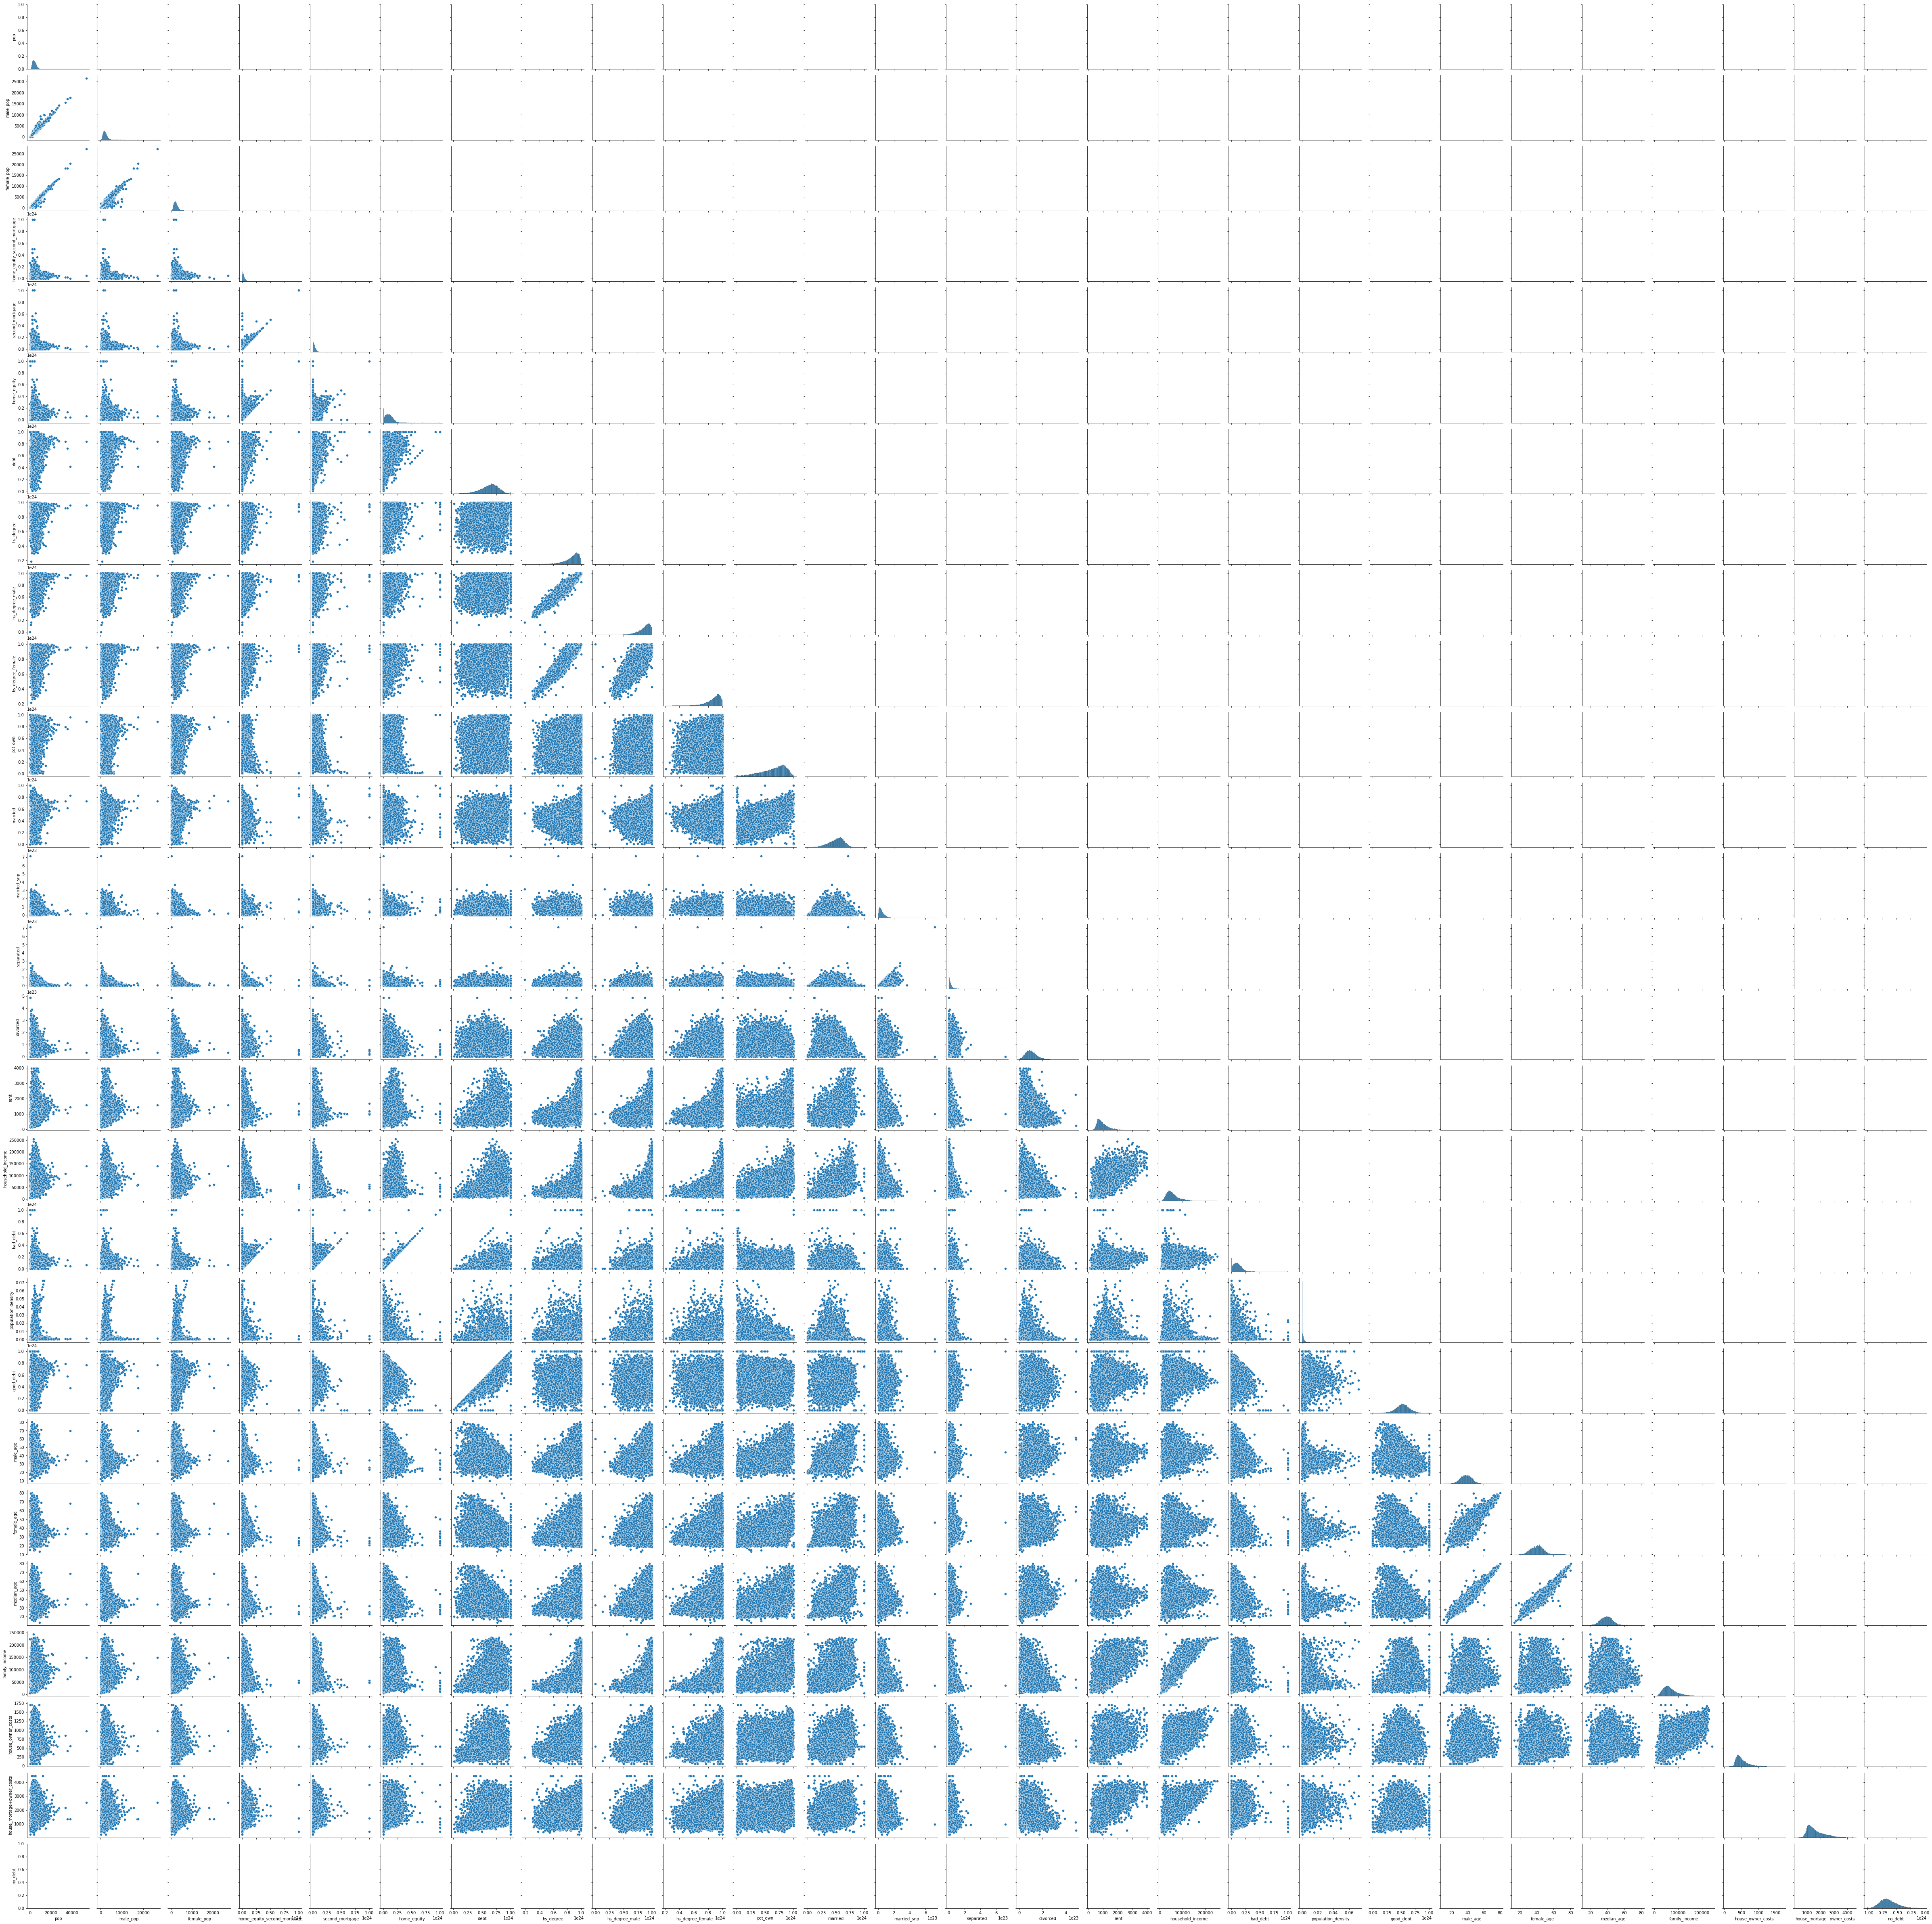

In [64]:
#sns.pairplot(train)

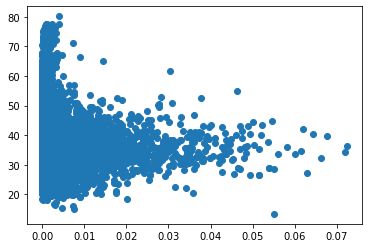

In [97]:
plt.scatter(train['population_density'],train['median_age'])

In [98]:
train['population_density'].corr(train['median_age'])

-0.20237214391113315

In [99]:
#collated income distribution chart for family income, house hold income and remaining income
data_c=['household_income','family_income','rent']
data_c=train[data_c]
data_c

household_income  family_income    rent
0               48120.0        53245.0   784.0
1               35186.0        43023.0   848.0
2               74964.0        85395.0   703.0
3               37845.0        44399.0   782.0
4               22497.0        50272.0   881.0
...                 ...            ...     ...
27316           13317.0        16760.0   419.0
27317          108284.0       113313.0  1788.0
27318           73350.0        81864.0   834.0
27319          148548.0       175952.0  1843.0
27320           38072.0        42544.0   924.0

[26748 rows x 3 columns]

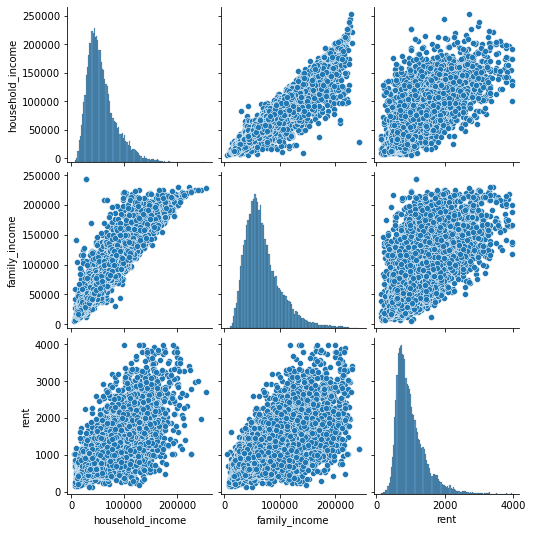

In [100]:
sns.pairplot(data_c)

In [101]:
data_c['total income']=data_c['household_income']+data_c['family_income']
data_c

household_income  family_income    rent  total income
0               48120.0        53245.0   784.0      101365.0
1               35186.0        43023.0   848.0       78209.0
2               74964.0        85395.0   703.0      160359.0
3               37845.0        44399.0   782.0       82244.0
4               22497.0        50272.0   881.0       72769.0
...                 ...            ...     ...           ...
27316           13317.0        16760.0   419.0       30077.0
27317          108284.0       113313.0  1788.0      221597.0
27318           73350.0        81864.0   834.0      155214.0
27319          148548.0       175952.0  1843.0      324500.0
27320           38072.0        42544.0   924.0       80616.0

[26748 rows x 4 columns]

In [102]:
data_c['rent'].corr(data_c['total income'])

0.7028549949074883

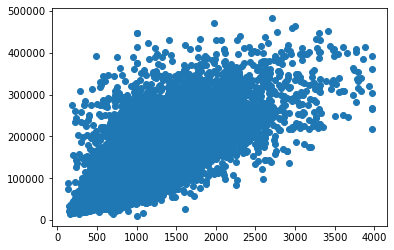

In [103]:
plt.scatter(data_c['rent'],(data_c['total income']))

In [104]:
#It can be implied that rent depends on total income
ext_col=train['city']
data_c=data_c.join(ext_col)
data_c

household_income  family_income    rent  total income         city
0               48120.0        53245.0   784.0      101365.0     Hamilton
1               35186.0        43023.0   848.0       78209.0   South Bend
2               74964.0        85395.0   703.0      160359.0     Danville
3               37845.0        44399.0   782.0       82244.0     San Juan
4               22497.0        50272.0   881.0       72769.0    Manhattan
...                 ...            ...     ...           ...          ...
27316           13317.0        16760.0   419.0       30077.0        Coamo
27317          108284.0       113313.0  1788.0      221597.0    Blue Bell
27318           73350.0        81864.0   834.0      155214.0      Weldona
27319          148548.0       175952.0  1843.0      324500.0  Colleyville
27320           38072.0        42544.0   924.0       80616.0    Las Vegas

[26748 rows x 5 columns]

In [105]:
#observations for rent as a percentage of income at an overall level and for different states
(data_c['rent'].sum()/data_c['total income'].sum())*100

0.7916963035244856

In [106]:
data_c['rentpct']=((data_c['rent']/data_c['total income'])*100)

In [107]:
data_c.groupby(['city']).sum()

household_income  family_income    rent  total income   rentpct
city                                                                          
Abbeville              310833.0       409488.0  4535.0      720321.0  4.620377
Aberdeen               403909.0       544805.0  6379.0      948714.0  5.520864
Abilene                398341.0       482577.0  7443.0      880918.0  7.979757
Abingdon               633814.0       743273.0  9816.0     1377087.0  6.292763
Abington               187064.0       209425.0  2647.0      396489.0  1.358323
...                         ...            ...     ...           ...       ...
Zionsville             157797.0       194243.0  2282.0      352040.0  1.312739
Zoarville               56923.0        68177.0   704.0      125100.0  0.562750
Zolfo Springs           34739.0        41781.0   769.0       76520.0  1.004966
Zumbrota                49992.0        69231.0   571.0      119223.0  0.478934
Zuni                    20210.0        22102.0   520.0       42312.0  1.228966

[6886 rows x 5 columns]

In [108]:
data_1=['pop','married','married_snp','separated','divorced']
data_1=train[data_1]
data_1

pop       married   married_snp     separated      divorced
0       5230  5.785100e+23  1.882000e+22  1.240000e+22  8.770000e+22
1       2633  3.488600e+23  1.426000e+22  1.426000e+22  9.030000e+22
2       6881  6.474500e+23  2.830000e+22  1.607000e+22  1.065700e+23
3       2700  4.725700e+23  2.021000e+22  2.021000e+22  1.010600e+23
4       5637  1.235600e+23  0.000000e+00  0.000000e+00  3.109000e+22
...      ...           ...           ...           ...           ...
27316   1847  2.460300e+23  3.042000e+22  2.249000e+22  1.468300e+23
27317   4155  6.112700e+23  5.003000e+22  2.473000e+22  4.888000e+22
27318   2829  7.045100e+23  1.386000e+22  5.200000e+21  7.712000e+22
27319  11542  7.550300e+23  2.287000e+22  9.150000e+21  5.261000e+22
27320   3726  3.442600e+23  3.825000e+22  3.005000e+22  1.332000e+23

[26748 rows x 5 columns]

In [109]:
data_1['pop'].describe()
data_1['bins']=pd.cut(x=data_1['pop'],bins=[0,12000,24000,36000,48000,60000])

In [110]:
data_1

pop       married   married_snp     separated      divorced  \
0       5230  5.785100e+23  1.882000e+22  1.240000e+22  8.770000e+22   
1       2633  3.488600e+23  1.426000e+22  1.426000e+22  9.030000e+22   
2       6881  6.474500e+23  2.830000e+22  1.607000e+22  1.065700e+23   
3       2700  4.725700e+23  2.021000e+22  2.021000e+22  1.010600e+23   
4       5637  1.235600e+23  0.000000e+00  0.000000e+00  3.109000e+22   
...      ...           ...           ...           ...           ...   
27316   1847  2.460300e+23  3.042000e+22  2.249000e+22  1.468300e+23   
27317   4155  6.112700e+23  5.003000e+22  2.473000e+22  4.888000e+22   
27318   2829  7.045100e+23  1.386000e+22  5.200000e+21  7.712000e+22   
27319  11542  7.550300e+23  2.287000e+22  9.150000e+21  5.261000e+22   
27320   3726  3.442600e+23  3.825000e+22  3.005000e+22  1.332000e+23   

             bins  
0      (0, 12000]  
1      (0, 12000]  
2      (0, 12000]  
3      (0, 12000]  
4      (0, 12000]  
...           ...  
27316  (0, 12000]  
27317  (0, 12000]  
27318  (0, 12000]  
27319  (0, 12000]  
27320  (0, 12000]  

[26748 rows x 6 columns]

In [111]:
data_=data_1.groupby('bins')

In [112]:
data_.sum()

pop       married   married_snp     separated  \
bins                                                                  
(0, 12000]      114222958  1.359977e+28  1.248933e+27  5.065736e+26   
(12000, 24000]    2165550  8.561080e+25  5.910760e+24  2.025840e+24   
(24000, 36000]     147837  3.257860e+24  1.412800e+23  5.372000e+22   
(36000, 48000]      38169  8.306800e+23  1.131000e+22  5.520000e+21   
(48000, 60000]      53812  7.347400e+23  2.058000e+22  4.050000e+21   

                    divorced  
bins                          
(0, 12000]      2.679388e+27  
(12000, 24000]  1.030184e+25  
(24000, 36000]  4.066400e+23  
(36000, 48000]  6.305000e+22  
(48000, 60000]  3.036000e+22

array([[<AxesSubplot:title={'center':'(0, 12000]'}>,
        <AxesSubplot:title={'center':'(12000, 24000]'}>],
       [<AxesSubplot:title={'center':'(24000, 36000]'}>,
        <AxesSubplot:title={'center':'(36000, 48000]'}>],
       [<AxesSubplot:title={'center':'(48000, 60000]'}>, <AxesSubplot:>]],
      dtype=object)

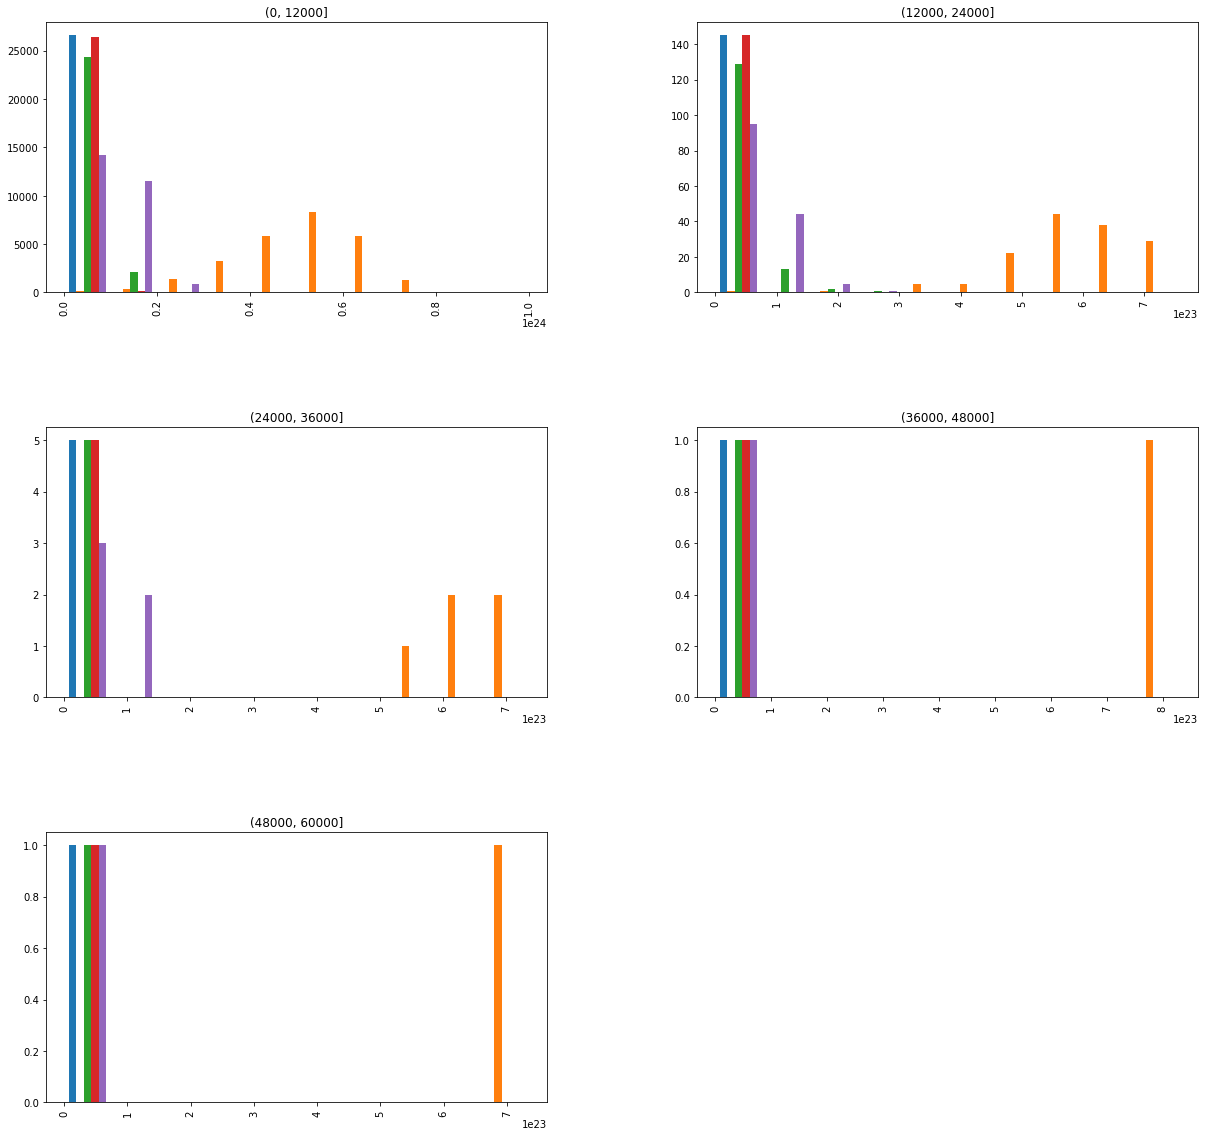

In [113]:
data_1.hist(by=['bins'],figsize=(20,20))

In [ ]:
train.to_excel(r'C:\Users\lenovo\Downloads\Project 1\modeltrain.xlsx',index=False)
test.to_excel(r'C:\Users\lenovo\Downloads\Project 1\modeltest.xlsx',index=False)